# Machine Learning with Scikit Learn

## Introduction

Welcome to our workshop! Before we get right into the code, we'd should set the scene.

Machine learning is a vast expanse. It makes beautiful algorithmic connections between statistics, linear algebra, calculus, and human creativity. While some of you may already posses much of the requisite knowledge needed in each of these fields to understand complex ideas, it is important to take a look at the essentials of ML first without deferring to its overwhelming depth.

The most effective way to learn any concept is to master the basics. 

If this is your first time even considering ML, this notebook aims to give you a sufficient overview of some of the most important aspects, which will become second nature as you continue to learn. If you consider yourself an experienced, then we hope that this notebook may serve as a reference and reinforcement for what know.

You may want to jump directly into Deep Learning with libraries like PyTorch and Tensorflow, but starting with these basics will make your life easier down the line.

This notebook is structured as follows: the first part is a demonstration, while the second is an hommage to Dr. Matt Demers. The first part is a reference for the For You To Try.

If you would like to provide any constructive feedback to us about the workshop, please send it to aiclub@uoguelph.ca and we will continue to work to provide informative workshops in the future



This notebook was originally prepared for the Guelph AI Club and assumes you have some knowledge of the libraries Pandas, NumPy and Matplotlib. It also assumes you have a basic understanding of some machine learning concepts and models that were introduced to the club in a previous presentation.

(Survey the group's knowledge of:
- Classification/regression
- Supervised/unsupervised
- Machine learning/Deep learning)

In [1]:
# first we import our relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

scikit learn is a huge library, so to keep our code efficient it's standard to only import the functions we need. As we proceed through this workshop, we will be importing the relevant functions

## Machine Learning Pipeline

As you begin to learn how to code AI, you'll follow similar steps as you go. These can be reduced to 3 main steps:


1.   Importing, manipulating and visualizing data
2.   Selecting and fitting a model
3.   Analyzing results and tuning hyperparameters

In this workshop we will see some examples of these steps, and how the Python libraries we've looked at in previous workshops come into play.

## 1. Importing, Manipulating and Visualizing data

---



### Importing our data

scikit learn has a few built in datasets that are simple but effective for getting the hang of ML coding. It's tempting to jump into complex modelling right away, but we believe it will be better in the long run to work with these simple datasets first

In [2]:
from sklearn import datasets #import the datasets function. this gives us access to the different datasets available through sklearn

iris = datasets.load_iris()
type(iris)

ModuleNotFoundError: No module named 'sklearn'

Similar to how Numpy introduces a new object called `ndarray`, sklearn has its own data structure called a `bunch`. If you'd like to learn more, you can go to https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html but we won't be exploring them in depth here. What's important to know is that these bunches contain different sets of the data in our dataset.

If we print out iris, we can see that we have a dictionary-like list of keys and values.

In [ ]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### Manipulating our data

Most important to us here are the `data`, `target`, `target_names`, and `feature_names` keys. Let's store them in a single Pandas dataframe. We don't *need* to do this, but it's good for practice. The iris data we imported is ready for a train/test split on its own, but this won't always be the case.

In [ ]:
print(type(iris.data))
print(type(iris.target))
print(type(iris.target_names))
print(type(iris.feature_names))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'list'>


#### DataFrames

In [ ]:
datadf = pd.DataFrame(data=iris.data, columns=iris.feature_names) #create the dataframe with the data and their feature names
targetdf = pd.DataFrame(data=iris.target, columns=['Target'])

irisdf = pd.concat([datadf, targetdf], axis=1) #concatenate the data with the target
irisdf.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [ ]:
irisdf.shape # We can see we have 150 different samples of data to work with

(150, 5)

#### Training and testing sets

Now let's use our first scikit learn function! Splitting data into training and testing sets is the first step towards training an ML model. A model is tuned using the training set, and its accuracy is measured with the testing set - make sure your model never sees the data in the testing set until you're checking accuracy! By showing a model new data it hasn't been trained on, you can get an idea of how well it learned from the training data.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, stratify=iris.target, random_state=3)
print("X_train shape:",X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (120, 4)
y_train shape: (120,)


As we can see there are a few parameters we can change
* `test_size` determines the percentage of data that goes to the testing set. A common practice is 80% training and 20% testing.
* `random_state` gives us a seed so that the random distribution of the data is replicable.
* `stratify` ensures that there is equal representation of each class in both sets. A dataset won't always have an equal distribution of each class.

We've created 4 new variables:

* `X_train` and `y_train` are the variables we use to fit our model.
* `X_test` is the variable we use to create predictions.
* `y_test` is the variable we compare our predictions to.

And that's pretty much all there is to it! (Data partitioning can go deeper than this, but for now this is more than adequate. Cross-validation is mentioned later).

### Visualizing our data

Let's visualize our data. By visualizing our data, we can gain a better understanding of its structure, which may help us choose a model down the road, or better understand the hyperparameters we will be tuning. First we have to consider the dimensionality of our data. We have 4 attributes, which means we have 4 dimensions! We can't visualize all 4 dimensions at once, so we can make

$\binom{n}{k} = \frac{n!}{k!(n - k)!} $

$\binom{4}{2} = \frac{4!}{2!(4 - 2)!} $
$ = 6 $

6 two-dimensional plots

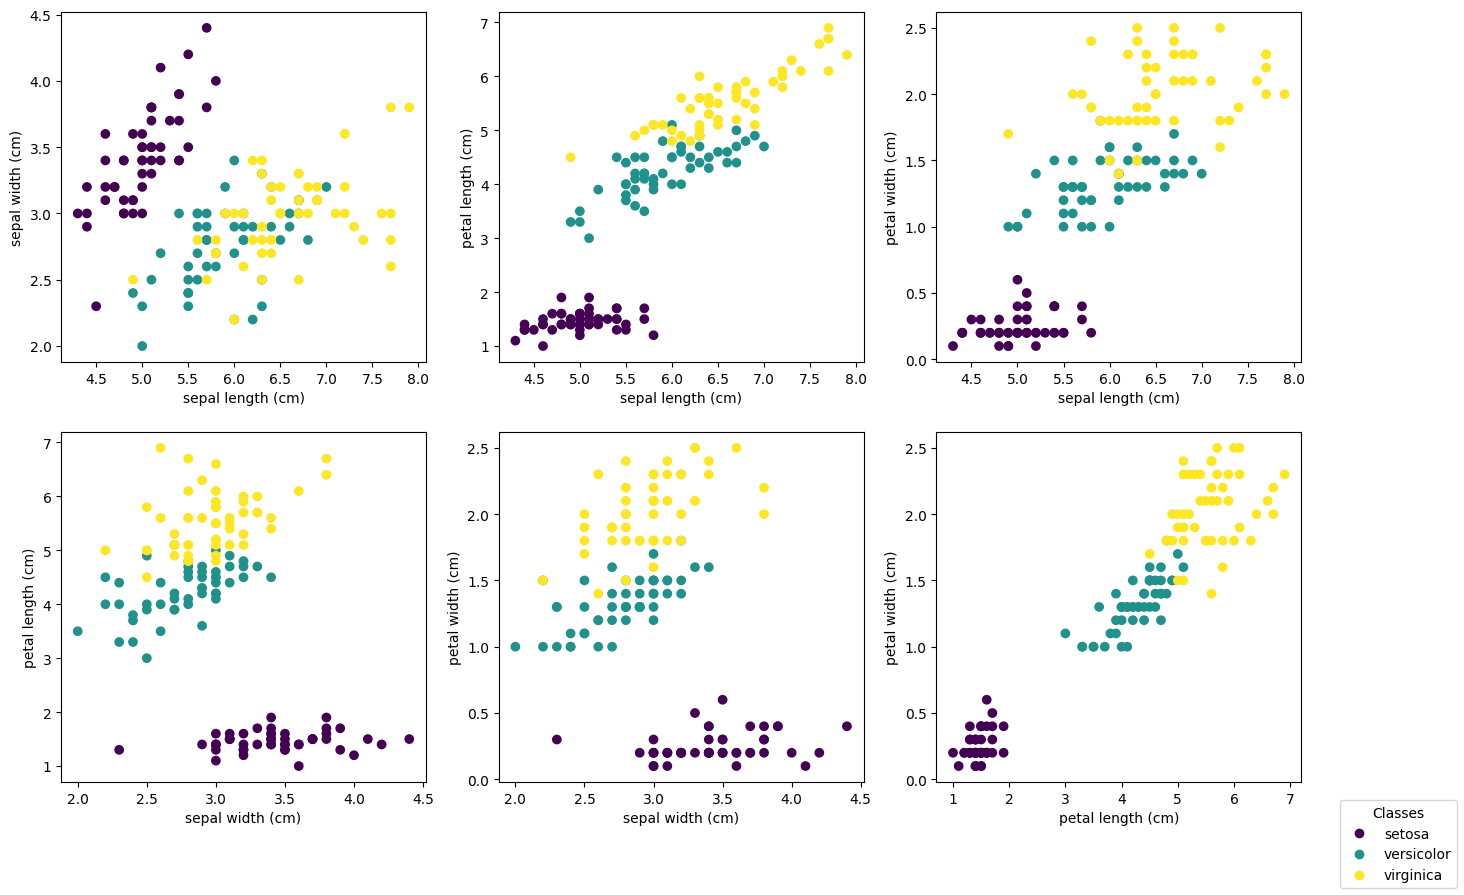

In [ ]:
figure, axis = plt.subplots(2, 3, figsize=(16,10))

dimensions = len(iris.feature_names)
axis = axis.flatten()
index = 0

for i in range(dimensions - 1):
  for j in range(i + 1, dimensions):

    scatter = axis[index].scatter(iris.data[:, i], iris.data[:, j], c=iris.target)
    axis[index].set(xlabel=iris.feature_names[i], ylabel=iris.feature_names[j])
    index += 1

figure.legend(scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")

We can see that the setosa class is more distinctly separated, while there is more overlap between virginica and versicolor. We can infer from this that any model we choose should be more accurate at identifying setosa, and we should expect some misclassification between the other two. That should be it for our data manipulation and visualiztion!

## 2. Selecting and Fitting a Model

---



Model selection is mostly done through trial and error, and seeing what works. Thankfully this process is easy so we can do multiple at once. In our presentation we talked about 3 models:

* K-Nearest-Neighbours (KNN)
* Decision Tree (DT)
* Support Vector Machine (SVM)

Before we implement these, lets take a second to think about our data and the problem we want to solve. We have 4 attributes and a discrete target class associated with each entry; this tells us that we have a **classification** problem, and that we should use classification models.

Let's start with KNN

### KNN

In [ ]:
# first we import the model
from sklearn.neighbors import KNeighborsClassifier # note that we're implementing the KNN classifier, there is also a KNN regressor

# we then create a new model
KNN_model = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean') # this is our k value. we don't know what the best value will be, let's start with a guess of 3. we can also tune the metric parameter.

# we train the model on our training data. this is called fitting
KNN_model.fit(X_train, y_train)

# we pass our testing data into the model to get predicted classes
KNN_predicted = KNN_model.predict(X_test)

It's simple to impliment and train a ML model!

### DT

In [ ]:
# import the model
from sklearn.tree import DecisionTreeClassifier # there is also a DT regressor

# create a new model
DT_model = DecisionTreeClassifier(random_state=0) # we will leave the default hyperparameters for now

# train the model on our training data
DT_model.fit(X_train, y_train)

# pass in the testing data
DT_predicted = DT_model.predict(X_test)

### SVM

In [ ]:
# import the model
from sklearn import svm

# create a new model
SVM_model = svm.SVC() # we will leave the default hyperparameters for now. there is also a SVM regressor

# train the model on our training data
SVM_model.fit(X_train, y_train)

# pass in the testing data
SVM_predicted = SVM_model.predict(X_test)

To recap, we've made 3 models and mostly left their hyperparameters to the defaults. We have:

* KNN_model
* DT_model
* SVM_model

We fit the models to our training data, then created predictions for our test data.

In the next section we will test the accuracy of our predictions, and attempt to improve upon them by changing hyperparameters.

# 3. Analyzing Results and Tuning Hyperparameters

---



## Analyzing results
We've created our models, we've taught them with our training data, and we've predicted the classes of our test data. Now let's see how they did.

In [ ]:
# accuracy_score is a simple function that tells us the percentage correctly predicted
from sklearn import metrics
from sklearn.metrics import accuracy_score

KNN_acc = accuracy_score(y_test, KNN_predicted)
DT_acc = accuracy_score(y_test, DT_predicted)
SVM_acc = accuracy_score(y_test, SVM_predicted)

print("KNN accuracy:", KNN_acc)
print("DT accuracy:", DT_acc)
print("SVM accuracy:", SVM_acc)


KNN accuracy: 0.9333333333333333
DT accuracy: 0.9
SVM accuracy: 0.9


It seems our models did pretty well! Depending on the type of problem, 90% isn't bad. This won't always be the case; thankfully our data is pretty simple this time around. Let's see where they went wrong with a confusion matrix.

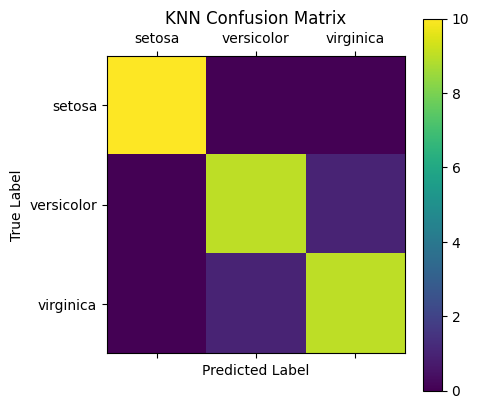

In [ ]:
from sklearn.metrics import confusion_matrix

cm_KNN = confusion_matrix(y_test, KNN_predicted)
plt.matshow(cm_KNN) # we use matshow to show a matrix

plt.xticks(ticks=np.arange(len(iris.target_names)), labels=iris.target_names)
plt.yticks(ticks=np.arange(len(iris.target_names)), labels=iris.target_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('KNN Confusion Matrix')
plt.colorbar()


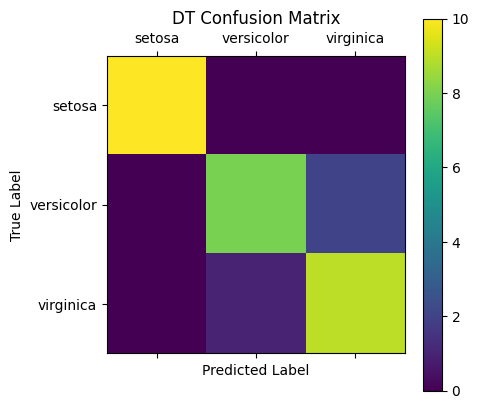

In [ ]:
cm_DT = confusion_matrix(y_test, DT_predicted)
plt.matshow(cm_DT) # we use matshow to show a matrix

plt.xticks(ticks=np.arange(len(iris.target_names)), labels=iris.target_names)
plt.yticks(ticks=np.arange(len(iris.target_names)), labels=iris.target_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('DT Confusion Matrix')
plt.colorbar()

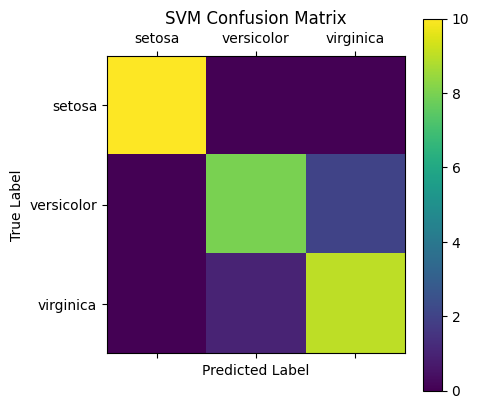

In [ ]:
cm_SVM = confusion_matrix(y_test, SVM_predicted)
plt.matshow(cm_SVM) # we use matshow to show a matrix

plt.xticks(ticks=np.arange(len(iris.target_names)), labels=iris.target_names)
plt.yticks(ticks=np.arange(len(iris.target_names)), labels=iris.target_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SVM Confusion Matrix')
plt.colorbar()

As we predicted when we visualized our data, our models made some misclassifications between virginica and versicolor, but had no problem identifying setosa.

## Tuning hyperparameters

Let's change some hyperparameters to see if we can get our accuracy even higher. We should be able to reach 100% with this dataset. Different types of models have different hyperparameters, and it can be challenging at first to know what to change and what exactly is being changed. To see a list of possible hyperparameters, we rely on the sklearn documentation:

* KNN: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
* DT: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
* SVM: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html


Let's create a new model for each and change some hyperparameters

In [ ]:
# our new KNN model called KNN2
KNN2 = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan') # changed the n_neighbors to 5 and the metric to manhattan
KNN2.fit(X_train, y_train)
KNN2_predicted = KNN2.predict(X_test)

# our new DT model called DT2
DT2 = DecisionTreeClassifier(criterion='log_loss', splitter = 'random', random_state=1) # changed the criterion to log loss, the splitter to random, and the random state to 1
DT2.fit(X_train, y_train)
DT2_predicted = DT2.predict(X_test)

# our new SVM model called SVM2
SVM2 = svm.SVC(C=100, kernel='poly', gamma='auto') # changed C to 100, the kernel to poly, and the gamma to auto
SVM2.fit(X_train, y_train)
SVM2_predicted = SVM2.predict(X_test)

In [ ]:
KNN2_acc = accuracy_score(y_test, KNN2_predicted)
DT2_acc = accuracy_score(y_test, DT2_predicted)
SVM2_acc = accuracy_score(y_test, SVM2_predicted)

print("KNN accuracy:", KNN2_acc)
print("DT accuracy:", DT2_acc)
print("SVM accuracy:", SVM2_acc)

KNN accuracy: 0.9333333333333333
DT accuracy: 0.9333333333333333
SVM accuracy: 0.9666666666666667


After fiddling with the hyperparameters a bit, we have improvement in the DT and the SVM models, but not the KNN model. Should we keep playing with the hyperparameters until we can get 100% accuracy? We could, but there's another thing we could look at first. It might be that the split of our data isn't the best, so let's try a new train/test split.

## Finding a better train/test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, stratify=iris.target, random_state=0) # let's change the random state from 3 to 0

In [ ]:
# our new KNN model called KNN2
KNN2 = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan') # changed the n_neighbors to 5 and the metric to manhattan
KNN2.fit(X_train, y_train)
KNN2_predicted = KNN2.predict(X_test)

# our new DT model called DT2
DT2 = DecisionTreeClassifier(criterion='log_loss', splitter = 'random', random_state=1) # changed the criterion to log loss, the splitter to random, and the random state to 1
DT2.fit(X_train, y_train)
DT2_predicted = DT2.predict(X_test)

# our new SVM model called SVM2
SVM2 = svm.SVC(C=100, kernel='poly', gamma='auto') # changed C to 100, the kernel to poly, and the gamma to auto
SVM2.fit(X_train, y_train)
SVM2_predicted = SVM2.predict(X_test)

In [ ]:
KNN2_acc = accuracy_score(y_test, KNN2_predicted)
DT2_acc = accuracy_score(y_test, DT2_predicted)
SVM2_acc = accuracy_score(y_test, SVM2_predicted)

print("KNN accuracy:", KNN2_acc)
print("DT accuracy:", DT2_acc)
print("SVM accuracy:", SVM2_acc)

KNN accuracy: 0.9666666666666667
DT accuracy: 1.0
SVM accuracy: 1.0


Would you look at that! Just by changing the random state of the data split, 2 of our models are 100% accurate and our KNN was also improved. Let's try once more to further tune our KNN model to see if we can get 100% accuracy.

In [ ]:
KNN2 = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean') # changed the n_neighbors to 3 and the metric back to euclidean
KNN2.fit(X_train, y_train)
KNN2_predicted = KNN2.predict(X_test)

KNN2_acc = accuracy_score(y_test, KNN2_predicted)
print("KNN accuracy:", KNN2_acc)

KNN accuracy: 1.0


100%!

We hope this section has demonstrated not only the importance of hyperparameters, but also the training and testing sets of our data. The way we split our training and testing data here is pretty simple; this is okay for our first models! But training and testing can go deeper than this, and eventually it's something you should be comfortable with for both Machine Learning and Deep Learning models. If you're interested, this sklearn page will provide you with more context:

* Cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html

# Supervised Regression
The machine learning pipeline we've outlined above is generic enough that it works for all kinds of problems. If you recall from our presentation there are different types of problems that we may want to solve, differentiated in two ways:

* Supervised or Unsupervised
* Classification or Regression

Supervised learning problems include a **known discrete target class (classification)** or a **continuous target value (regression)** in the training data. Unsupervised learning includes no information of target labels or values and instead tries to form relationships between the data based on underlying structures.  

Supervised classification and regression are straight-forward conceptually, whereas unsupervised problems require a bit more thought; we do not cover unsupervised problems in this tutorial. If you'd like to learn more about unsupervised learning it would be best to start with:
* **clustering**: https://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods
* **Principal Component Analysis (dimensionality reduction)**: https://scikit-learn.org/stable/modules/decomposition.html#principal-component-analysis-pca

The iris dataset in our above example is an example of a supervised classification problem because we are given information about the data (sepal length/width, petal length/width), and we know the classes associated with each sample (setosa, versicolor, virginica). As mentioned, the models we set up are specifically for supervised classification. If we want to work with a supervised regression problem we will follow the same pipeline, but the specifics of the steps will change.

  

In [ ]:
diabetes = datasets.load_diabetes()

In [ ]:
diabetes_data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_features = pd.DataFrame(data=diabetes.target, columns=['Target'])
diabetes_df = pd.concat([diabetes_data, diabetes_features], axis=1)
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


We can see that our target is now a continuous variable

Splitting data is the same for classification and regression.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=0) # stratify wouldn't work here, think about why

We need different regression specific models and accuracy metrics. Instead of a correct or incorrect classification, the error associated with regression relates to the distance of our predictions from the actual value.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import	mean_squared_error


dt_reg = DecisionTreeRegressor(random_state=3, max_depth = 5, criterion = 'squared_error')
dt_reg.fit(X_train, y_train)

reg_predict = dt_reg.predict(X_test)

print(mean_absolute_error(y_test, reg_predict))
print(max_error(y_test, reg_predict))
print(mean_squared_error(y_test, reg_predict))

53.74776264539719
169.22222222222223
4633.405488170486


For the sake of time, we haven't gone into depth with regression here. This workshop is mainly meant to get used to the typical steps you'll take when you start working on your own models.

# For You To Try

Now that we've gone through the typical machine learning pipeline for a classification problem, we want you to try to apply what you've learned here yourself. Sklearn has a lot of free datasets to work with: https://scikit-learn.org/stable/datasets.html

---



## MNIST dataset
The MNIST dataset is a popular beginner dataset for optical character recognition. We can follow the same steps as we did for the iris dataset.

In [ ]:
# load your data
digits = datasets.load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
print(type(digits.data))
print(digits.data.shape) # we have 1797 images with 64 pixels each
print(digits.images.shape)

<class 'numpy.ndarray'>
(1797, 64)
(1797, 8, 8)


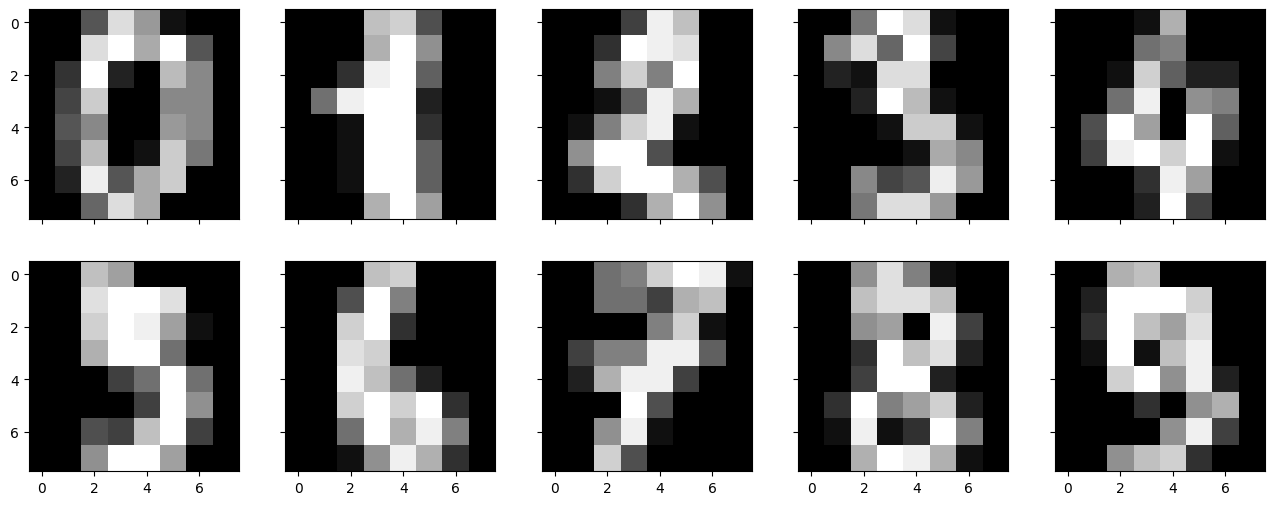

In [ ]:
# visualize our data
figure, axis = plt.subplots(2, 5, figsize=(16, 6), sharey = True, sharex = True)
axis = axis.flatten()

for i in range(10):
  axis[i].imshow(digits.images[i], cmap='gray')

### Create your train/test split

In [ ]:
# fill out the train_test_split function with the relevant variables
X_train, X_test, y_train, y_test = train_test_split( _ )

TypeError: Singleton array array(dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR']),
      dtype=object) cannot be considered a valid collection.

### Create your models

In [ ]:
# you can choose any model you like. Any of the ones we've gone through today will work
# SKLearn also has simple neural networks (MLP), if you'd like to try to impliment one of those from the documentation

your_model = _

# once you've created your model, fit your training data to it

_

# generate predicted classes with your model from your testing data

_

### Check your results

In [ ]:
# check the accuracy of your results, and create a confusion matrix

# accuracy
_

# confusion matrix
cm_ = confusion_matrix( , ) # fill in the relevant values
plt.matshow(cm_ ) # fill in the relevant values

plt.xticks(ticks=np.arange(len( )), labels= ) # fill in the relevant values
plt.yticks(ticks=np.arange(len( )), labels= ) # fill in the relevant values

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.colorbar()

# What's Next?

As always, this was just a brief overview of how your future ML projects might look. We have to balance how much we introduce to you so as to not overwhelm you. Machine learning is vast and it would be impossible to present it in its entirety in one workshop.

Part of the fun of ML is playing around with models, learning how they work, and seeing how they perform on different datasets. We believe we've provided you with enough context here to get you started on your own simple ML models - if you're looking for some direction, we suggest you make an attempt at the Titanic competition on Kaggle: https://www.kaggle.com/competitions/titanic

Using the tools presented in this workshop you will be able to make your own submission to the competition (the only "competitive" part is the leaderboard, there is no prize for this competition) and should provide you a base to learn from on your own.


To learn more, our most recommended resources are
* StatQuest on YouTube: https://www.youtube.com/watch?v=Gv9_4yMHFhI&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF
* Kaggle: https://www.kaggle.com/learn
* Or just reading through the scikit learn documentation